In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((32165, 8), (10760, 7))

In [3]:
# drop_cols = ['name_of_drug', 'use_case_for_drug', 'review_by_patient']
# train = train.drop(drop_cols, axis=1)
# test = test.drop(drop_cols, axis=1)
# train.shape, test.shape

In [4]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


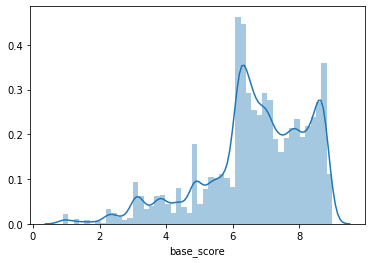

In [5]:
sns.distplot(train['base_score'])

In [6]:
train['drug_approved_by_UIC'] = pd.to_datetime(train['drug_approved_by_UIC'])
test['drug_approved_by_UIC'] = pd.to_datetime(test['drug_approved_by_UIC'])
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782


In [7]:
train['drug_approved_by_UIC'].min(), train['drug_approved_by_UIC'].max()

(Timestamp('2008-02-24 00:00:00'), Timestamp('2017-12-12 00:00:00'))

In [8]:
test['drug_approved_by_UIC'].min(), test['drug_approved_by_UIC'].max()

(Timestamp('2008-02-25 00:00:00'), Timestamp('2017-12-12 00:00:00'))

In [9]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",2017-03-05,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",2014-07-03,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",2016-10-18,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",2015-01-13,44,Insomnia,2


In [10]:
data = pd.concat([train, test]).reset_index(drop=True)
data.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782


In [11]:
def time_features(data):
    data['year'] = data['drug_approved_by_UIC'].dt.year
    data['month'] = data['drug_approved_by_UIC'].dt.month
    data['day'] = data['drug_approved_by_UIC'].dt.day
    data['dayofyear'] = data['drug_approved_by_UIC'].dt.dayofyear
    data['dayofweek'] = data['drug_approved_by_UIC'].dt.dayofweek
    data['week'] = data['drug_approved_by_UIC'].dt.week
    data['quarter'] = data['drug_approved_by_UIC'].dt.quarter
    data['Is_month_start'] = pd.to_datetime(data['drug_approved_by_UIC']).dt.is_month_start.astype(int)
    data['Is_month_end'] = pd.to_datetime(data['drug_approved_by_UIC']).dt.is_month_end.astype(int) 
    data['Is_quarter_start'] = pd.to_datetime(data['drug_approved_by_UIC']).dt.is_quarter_start.astype(int)
    data['Is_quarter_end'] = pd.to_datetime(data['drug_approved_by_UIC']).dt.is_quarter_end.astype(int) 
    data['Is_year_start'] = pd.to_datetime(data['drug_approved_by_UIC']).dt.is_year_start.astype(int) 
    data['Is_year_end'] = pd.to_datetime(data['drug_approved_by_UIC']).dt.is_year_end.astype(int)
    data['Semester'] = np.where(data['quarter'].isin([1,2]),1,2)
    
    return data

In [12]:
data.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782


In [13]:
data['review_by_patient'] = data['review_by_patient'].str.replace('"', '')

In [14]:
# data['Review'] = (data['name_of_drug']+' '+data['use_case_for_drug']+' '+data['review_by_patient']).apply(lambda x: x.strip())
# df = data[['Review', 'base_score']]
# df.head()

In [15]:
# df = df[df['Review'] != '']
# df.info()

In [16]:
# import string

# df['char_count'] = df['Review'].apply(len)
# df['word_count'] = df['Review'].apply(lambda x: len(x.split()))
# df['word_density'] = df['char_count'] / (df['word_count']+1)
# df['punctuation_count'] = df['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
# df['title_word_count'] = df['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
# df['upper_case_word_count'] = df['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


In [17]:
# import textblob
# pos_family = {
#     'noun' : ['NN','NNS','NNP','NNPS'],
#     'pron' : ['PRP','PRP$','WP','WP$'],
#     'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
#     'adj' :  ['JJ','JJR','JJS'],
#     'adv' :  ['RB','RBR','RBS','WRB']
# }

# # function to check and get the part of speech tag count of a words in a given sentence
# def check_pos_tag(x, flag):
#     cnt = 0
#     try:
#         wiki = textblob.TextBlob(x)
#         for tup in wiki.tags:
#             ppo = list(tup)[1]
#             if ppo in pos_family[flag]:
#                 cnt += 1
#     except:
#         pass
#     return cnt

In [18]:
# df['noun_count'] = df['Review'].apply(lambda x: check_pos_tag(x, 'noun'))
# df['verb_count'] = df['Review'].apply(lambda x: check_pos_tag(x, 'verb'))
# df['adj_count'] = df['Review'].apply(lambda x: check_pos_tag(x, 'adj'))
# df['adv_count'] = df['Review'].apply(lambda x: check_pos_tag(x, 'adv'))
# df['pron_count'] = df['Review'].apply(lambda x: check_pos_tag(x, 'pron'))

In [19]:
# df_snt_obj = df['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
# df['Polarity'] = [obj.polarity for obj in df_snt_obj.values]
# df['Subjectivity'] = [obj.subjectivity for obj in df_snt_obj.values]

In [20]:
# data[['char_count', 'word_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count',
#        'Polarity', 'Subjectivity']] = df[['char_count', 'word_count', 'word_density','punctuation_count', 'title_word_count', 'upper_case_word_count','Polarity', 'Subjectivity']]

In [21]:
data.shape

(42925, 8)

In [22]:
# data = time_features(data)
# data.shape

In [23]:
data.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9,2012-05-20,27,8.022969
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,2010-04-27,192,7.858458
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9,2016-11-27,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2,2015-11-28,43,6.144782


In [24]:
# data['avg_rating_date'] = data.groupby(['drug_approved_by_UIC'])['effectiveness_rating'].transform('mean')
# data['avg_rating_year'] = data.groupby(['year'])['effectiveness_rating'].transform('mean')
# data['avg_rating_month'] = data.groupby(['month'])['effectiveness_rating'].transform('mean')
# data['avg_rating_day'] = data.groupby(['day'])['effectiveness_rating'].transform('mean')
# data['avg_rating_week'] = data.groupby(['week'])['effectiveness_rating'].transform('mean')

In [25]:
# data['tot_prescription_date'] = data.groupby(['drug_approved_by_UIC'])['number_of_times_prescribed'].transform('sum')
# data['tot_prescription_year'] = data.groupby(['year'])['number_of_times_prescribed'].transform('sum')
# data['tot_prescription_month'] = data.groupby(['month'])['number_of_times_prescribed'].transform('sum')
# data['tot_prescription_day'] = data.groupby(['day'])['number_of_times_prescribed'].transform('sum')
# data['tot_prescription_week'] = data.groupby(['week'])['number_of_times_prescribed'].transform('sum')

In [26]:
data.shape

(42925, 8)

In [27]:
data.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [28]:
data[['effectiveness_rating', 'number_of_times_prescribed']].describe()

,effectiveness_rating,number_of_times_prescribed
count,42925.000000,42925.000000
mean,6.990099,27.818707
std,3.274993,35.383755
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,771.000000


In [29]:
# data['presecription_div_rating'] = (data['number_of_times_prescribed']/data['effectiveness_rating'])
# data['pres_mult_rating'] = (data['number_of_times_prescribed']*data['effectiveness_rating'])

In [30]:
final_train = data[:train.shape[0]]
final_test = data[train.shape[0]:]
final_train.shape, final_test.shape

((32165, 8), (10760, 8))

In [31]:
X = final_train.drop(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient', 'drug_approved_by_UIC', 
                      'base_score'], axis=1)
y = final_train['base_score']
test_X = final_test.drop(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient', 
                          'drug_approved_by_UIC', 'base_score'], axis=1)
X.shape, test_X.shape

((32165, 2), (10760, 2))

In [32]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
from sklearn.ensemble import BaggingRegressor

In [35]:
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [78]:
%%time
i = 4

fold = KFold(n_splits = 10, random_state=int(i*25), shuffle=True)

err_gb_rmse = []
final_test_pred_gb = 0
f = 0
for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(loss='ls', 
                               learning_rate=0.1, 
                               n_estimators=1200, 
                               subsample=0.95, 
                               criterion='friedman_mse', 
                               min_samples_split=15, 
                               min_samples_leaf=4, 
                               min_weight_fraction_leaf=0.0, 
                               max_depth=4, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               init=None, 
                               random_state=100+i, 
                               max_features=None, 
                               alpha=0.8, 
                               verbose=100, 
                               max_leaf_nodes=None, 
                               warm_start=False, 
                               presort='auto')),

    XGBRegressor(learning_rate=0.1, max_depth=4, min_child_weight=6, n_estimators=10000, nthread=1, 
                 objective="reg:squarederror", subsample=0.95,random_state=int(29*i), min_samples_split=15, 
                               min_samples_leaf=4))

    exported_pipeline.fit(X_train, y_train)
    y_pred = pd.Series(exported_pipeline.predict(X_test))
    y_pred.loc[np.where(y_pred<0)] = 0

    test_pred = pd.Series(exported_pipeline.predict(test_X))
    test_pred.loc[np.where(test_pred<0)] = 0

    err_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    err_gb_rmse.append(err_rmse)

    final_test_pred_gb += test_pred

    f += 1
    print("Fold:", f)
    print("rmse Score:", err_rmse)
    print('*'*30)
print("rmse CV Score:", np.mean(err_gb_rmse))

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.2863           0.2249           26.31s
         2           2.0976           0.1929           24.92s
         3           1.9146           0.1710           25.53s
         4           1.7583           0.1362           25.61s
         5           1.6234           0.1353           25.50s
         6           1.5281           0.0926           24.89s
         7           1.4422           0.0737           24.73s
         8           1.3730           0.0619           24.60s
         9           1.2963           0.0766           24.15s
        10           1.2439           0.0488           24.60s
        11           1.1967           0.0442           24.48s
        12           1.1565           0.0383           24.29s
        13           1.1084           0.0391           24.44s
        14           1.0796           0.0298           24.10s
        15           1.0569           0.0220           24.04s
       

       133           0.1053           0.0002           20.12s
       134           0.1049           0.0005           20.09s
       135           0.1035           0.0015           20.03s
       136           0.1020           0.0017           19.98s
       137           0.1013           0.0017           19.94s
       138           0.0994           0.0008           19.94s
       139           0.0990          -0.0000           19.93s
       140           0.0982           0.0013           19.89s
       141           0.0962           0.0009           19.87s
       142           0.0955           0.0004           19.82s
       143           0.0941           0.0012           19.79s
       144           0.0923           0.0010           19.75s
       145           0.0922           0.0010           19.73s
       146           0.0918           0.0004           19.74s
       147           0.0913          -0.0002           19.73s
       148           0.0906           0.0009           19.73s
       1

       267           0.0381           0.0000           17.70s
       268           0.0380          -0.0001           17.69s
       269           0.0383           0.0002           17.67s
       270           0.0379          -0.0001           17.66s
       271           0.0375           0.0005           17.64s
       272           0.0371           0.0002           17.63s
       273           0.0369           0.0001           17.61s
       274           0.0366           0.0001           17.60s
       275           0.0362           0.0002           17.58s
       276           0.0363           0.0001           17.56s
       277           0.0353           0.0004           17.55s
       278           0.0354           0.0002           17.52s
       279           0.0352           0.0001           17.50s
       280           0.0355           0.0001           17.48s
       281           0.0344           0.0002           17.45s
       282           0.0347           0.0002           17.42s
       2

       411           0.0204          -0.0001           14.98s
       412           0.0203          -0.0001           14.98s
       413           0.0205           0.0000           14.96s
       414           0.0203           0.0001           14.94s
       415           0.0203          -0.0000           14.93s
       416           0.0201          -0.0001           14.90s
       417           0.0203          -0.0002           14.87s
       418           0.0201          -0.0000           14.84s
       419           0.0200          -0.0001           14.82s
       420           0.0200          -0.0000           14.79s
       421           0.0200           0.0000           14.77s
       422           0.0199           0.0000           14.75s
       423           0.0199          -0.0000           14.73s
       424           0.0201           0.0000           14.71s
       425           0.0198          -0.0002           14.69s
       426           0.0197           0.0000           14.68s
       4

       544           0.0159           0.0001           12.46s
       545           0.0160           0.0000           12.44s
       546           0.0158           0.0000           12.42s
       547           0.0156          -0.0000           12.41s
       548           0.0158          -0.0000           12.39s
       549           0.0158          -0.0001           12.37s
       550           0.0157          -0.0000           12.35s
       551           0.0157           0.0000           12.32s
       552           0.0154          -0.0001           12.30s
       553           0.0159           0.0000           12.27s
       554           0.0156           0.0000           12.25s
       555           0.0154           0.0000           12.23s
       556           0.0154          -0.0001           12.22s
       557           0.0154          -0.0001           12.20s
       558           0.0152           0.0001           12.18s
       559           0.0155           0.0000           12.17s
       5

       683           0.0128          -0.0000            9.87s
       684           0.0128          -0.0000            9.85s
       685           0.0129          -0.0001            9.83s
       686           0.0128          -0.0000            9.81s
       687           0.0127          -0.0000            9.80s
       688           0.0128           0.0000            9.78s
       689           0.0128           0.0000            9.76s
       690           0.0127          -0.0001            9.74s
       691           0.0129          -0.0000            9.72s
       692           0.0128          -0.0000            9.70s
       693           0.0127           0.0000            9.69s
       694           0.0129          -0.0000            9.67s
       695           0.0126           0.0000            9.65s
       696           0.0129          -0.0000            9.63s
       697           0.0128          -0.0000            9.61s
       698           0.0128           0.0000            9.60s
       6

       821           0.0109          -0.0000            7.29s
       822           0.0109          -0.0000            7.27s
       823           0.0108          -0.0001            7.25s
       824           0.0108          -0.0000            7.24s
       825           0.0108          -0.0000            7.22s
       826           0.0109          -0.0000            7.20s
       827           0.0107          -0.0000            7.18s
       828           0.0106           0.0002            7.16s
       829           0.0105          -0.0001            7.14s
       830           0.0106          -0.0000            7.12s
       831           0.0105          -0.0001            7.10s
       832           0.0104          -0.0001            7.08s
       833           0.0106          -0.0000            7.06s
       834           0.0106          -0.0000            7.05s
       835           0.0105          -0.0000            7.03s
       836           0.0105          -0.0000            7.01s
       8

       961           0.0084          -0.0000            4.60s
       962           0.0084          -0.0001            4.58s
       963           0.0084          -0.0000            4.56s
       964           0.0085          -0.0000            4.55s
       965           0.0085          -0.0000            4.53s
       966           0.0085          -0.0000            4.51s
       967           0.0084          -0.0000            4.49s
       968           0.0084           0.0000            4.47s
       969           0.0083           0.0000            4.45s
       970           0.0082           0.0000            4.43s
       971           0.0084          -0.0000            4.41s
       972           0.0084          -0.0000            4.39s
       973           0.0083           0.0001            4.37s
       974           0.0082          -0.0000            4.35s
       975           0.0082           0.0000            4.34s
       976           0.0083          -0.0000            4.32s
       9

      1097           0.0070           0.0000            1.99s
      1098           0.0071          -0.0000            1.97s
      1099           0.0071          -0.0000            1.95s
      1100           0.0069           0.0002            1.94s
      1101           0.0070          -0.0000            1.92s
      1102           0.0070          -0.0000            1.90s
      1103           0.0070          -0.0000            1.88s
      1104           0.0071          -0.0000            1.86s
      1105           0.0070          -0.0000            1.84s
      1106           0.0069          -0.0000            1.82s
      1107           0.0070           0.0000            1.80s
      1108           0.0069           0.0002            1.78s
      1109           0.0069          -0.0000            1.76s
      1110           0.0068           0.0001            1.74s
      1111           0.0067          -0.0000            1.72s
      1112           0.0067           0.0000            1.70s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


        10           1.2493           0.0586           23.75s
        11           1.2081           0.0390           23.76s
        12           1.1602           0.0442           23.83s
        13           1.1286           0.0329           23.63s
        14           1.1007           0.0254           23.61s
        15           1.0672           0.0317           23.47s
        16           1.0272           0.0390           23.32s
        17           1.0029           0.0272           23.46s
        18           0.9828           0.0214           23.24s
        19           0.9447           0.0361           23.35s
        20           0.9207           0.0206           23.38s
        21           0.9033           0.0192           23.38s
        22           0.8820           0.0248           23.59s
        23           0.8631           0.0130           23.48s
        24           0.8483           0.0166           22.91s
        25           0.8304           0.0195           23.45s
        

       150           0.0867           0.0008           20.69s
       151           0.0855           0.0007           20.68s
       152           0.0855           0.0001           20.65s
       153           0.0846           0.0010           20.65s
       154           0.0835           0.0014           20.62s
       155           0.0826           0.0008           20.57s
       156           0.0822           0.0001           20.52s
       157           0.0808           0.0005           20.48s
       158           0.0808          -0.0003           20.44s
       159           0.0810           0.0002           20.50s
       160           0.0800           0.0006           20.51s
       161           0.0797          -0.0002           20.47s
       162           0.0790           0.0006           20.46s
       163           0.0780           0.0004           20.37s
       164           0.0767           0.0019           20.43s
       165           0.0769           0.0001           20.31s
       1

       291           0.0320          -0.0002           17.88s
       292           0.0319           0.0001           17.86s
       293           0.0319          -0.0000           17.85s
       294           0.0318           0.0002           17.82s
       295           0.0313           0.0002           17.80s
       296           0.0317           0.0002           17.76s
       297           0.0314           0.0000           17.73s
       298           0.0311           0.0000           17.70s
       299           0.0306           0.0001           17.72s
       300           0.0310           0.0002           17.69s
       301           0.0307          -0.0004           17.69s
       302           0.0309           0.0001           17.68s
       303           0.0306           0.0002           17.65s
       304           0.0305           0.0001           17.60s
       305           0.0300           0.0000           17.61s
       306           0.0303           0.0002           17.58s
       3

       432           0.0207          -0.0001           15.09s
       433           0.0206           0.0000           15.07s
       434           0.0206          -0.0001           15.05s
       435           0.0206          -0.0000           15.03s
       436           0.0206          -0.0000           15.01s
       437           0.0205           0.0000           15.00s
       438           0.0203           0.0001           14.97s
       439           0.0203          -0.0000           14.96s
       440           0.0204           0.0001           14.94s
       441           0.0203          -0.0001           14.92s
       442           0.0201          -0.0001           14.90s
       443           0.0202          -0.0001           14.89s
       444           0.0204          -0.0000           14.86s
       445           0.0202          -0.0001           14.85s
       446           0.0201          -0.0001           14.83s
       447           0.0203          -0.0000           14.81s
       4

       573           0.0145           0.0002           12.32s
       574           0.0145          -0.0001           12.30s
       575           0.0145           0.0000           12.29s
       576           0.0144           0.0000           12.26s
       577           0.0143           0.0002           12.23s
       578           0.0141           0.0001           12.21s
       579           0.0141          -0.0000           12.18s
       580           0.0138           0.0000           12.16s
       581           0.0139           0.0001           12.13s
       582           0.0139          -0.0000           12.11s
       583           0.0140          -0.0000           12.10s
       584           0.0139          -0.0001           12.08s
       585           0.0139           0.0000           12.06s
       586           0.0138          -0.0001           12.04s
       587           0.0138          -0.0000           12.02s
       588           0.0137          -0.0000           12.01s
       5

       712           0.0118          -0.0000            9.46s
       713           0.0119          -0.0000            9.44s
       714           0.0118          -0.0000            9.42s
       715           0.0119           0.0000            9.40s
       716           0.0116           0.0000            9.39s
       717           0.0119          -0.0000            9.37s
       718           0.0119          -0.0000            9.35s
       719           0.0116           0.0000            9.33s
       720           0.0117          -0.0000            9.31s
       721           0.0117          -0.0000            9.29s
       722           0.0117           0.0001            9.27s
       723           0.0116          -0.0000            9.25s
       724           0.0116          -0.0001            9.23s
       725           0.0117          -0.0000            9.21s
       726           0.0115          -0.0000            9.19s
       727           0.0116           0.0000            9.18s
       7

       849           0.0102          -0.0000            6.84s
       850           0.0101          -0.0000            6.82s
       851           0.0101          -0.0000            6.80s
       852           0.0100           0.0000            6.78s
       853           0.0100          -0.0000            6.76s
       854           0.0102          -0.0000            6.74s
       855           0.0102          -0.0000            6.72s
       856           0.0099           0.0000            6.70s
       857           0.0100           0.0001            6.68s
       858           0.0100          -0.0000            6.66s
       859           0.0099          -0.0000            6.64s
       860           0.0100          -0.0000            6.61s
       861           0.0099          -0.0000            6.59s
       862           0.0099          -0.0000            6.57s
       863           0.0099          -0.0000            6.55s
       864           0.0099           0.0000            6.52s
       8

       991           0.0079           0.0000            4.05s
       992           0.0079          -0.0000            4.04s
       993           0.0079          -0.0000            4.02s
       994           0.0079          -0.0000            4.00s
       995           0.0079          -0.0000            3.98s
       996           0.0079          -0.0000            3.96s
       997           0.0078          -0.0000            3.94s
       998           0.0078           0.0001            3.92s
       999           0.0078          -0.0000            3.90s
      1000           0.0077           0.0000            3.88s
      1001           0.0078          -0.0000            3.86s
      1002           0.0078           0.0000            3.84s
      1003           0.0077          -0.0001            3.82s
      1004           0.0077           0.0001            3.80s
      1005           0.0078          -0.0000            3.78s
      1006           0.0077          -0.0000            3.76s
      10

      1134           0.0071          -0.0000            1.28s
      1135           0.0069          -0.0001            1.26s
      1136           0.0070           0.0000            1.24s
      1137           0.0071          -0.0000            1.22s
      1138           0.0070          -0.0000            1.20s
      1139           0.0070          -0.0000            1.18s
      1140           0.0071          -0.0000            1.16s
      1141           0.0070          -0.0000            1.14s
      1142           0.0069           0.0000            1.12s
      1143           0.0069           0.0000            1.10s
      1144           0.0070           0.0000            1.08s
      1145           0.0069          -0.0000            1.06s
      1146           0.0070          -0.0000            1.05s
      1147           0.0070          -0.0000            1.03s
      1148           0.0069          -0.0000            1.01s
      1149           0.0069          -0.0000            0.99s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


         9           1.3089           0.0561           26.75s
        10           1.2485           0.0584           26.64s
        11           1.2077           0.0410           26.36s
        12           1.1677           0.0394           26.12s
        13           1.1397           0.0297           25.92s
        14           1.0987           0.0391           25.56s
        15           1.0594           0.0422           25.43s
        16           1.0346           0.0283           25.30s
        17           1.0019           0.0295           25.18s
        18           0.9771           0.0236           24.92s
        19           0.9549           0.0241           24.83s
        20           0.9357           0.0170           24.75s
        21           0.9082           0.0260           24.67s
        22           0.8828           0.0307           24.60s
        23           0.8569           0.0242           24.57s
        24           0.8168           0.0439           24.65s
        

       145           0.0983           0.0008           20.97s
       146           0.0977           0.0013           20.92s
       147           0.0966           0.0010           20.90s
       148           0.0949           0.0013           20.88s
       149           0.0946           0.0009           20.86s
       150           0.0934           0.0004           20.84s
       151           0.0935           0.0000           20.77s
       152           0.0916           0.0007           20.72s
       153           0.0903           0.0011           20.68s
       154           0.0908           0.0001           20.73s
       155           0.0909           0.0001           20.65s
       156           0.0898           0.0011           20.71s
       157           0.0884           0.0011           20.59s
       158           0.0873           0.0012           20.58s
       159           0.0857           0.0007           20.58s
       160           0.0857           0.0002           20.56s
       1

       283           0.0382           0.0004           18.09s
       284           0.0385           0.0001           18.07s
       285           0.0383           0.0002           18.05s
       286           0.0380           0.0002           18.03s
       287           0.0380          -0.0001           18.01s
       288           0.0373           0.0005           18.00s
       289           0.0369           0.0000           17.97s
       290           0.0370           0.0001           17.95s
       291           0.0364           0.0002           17.93s
       292           0.0368           0.0001           17.91s
       293           0.0364           0.0003           17.88s
       294           0.0365          -0.0000           17.88s
       295           0.0365           0.0000           17.85s
       296           0.0363          -0.0002           17.83s
       297           0.0362           0.0002           17.81s
       298           0.0355          -0.0001           17.79s
       2

       420           0.0220          -0.0000           15.37s
       421           0.0217           0.0001           15.34s
       422           0.0218           0.0000           15.32s
       423           0.0218           0.0000           15.31s
       424           0.0219          -0.0002           15.27s
       425           0.0215          -0.0000           15.27s
       426           0.0218          -0.0000           15.24s
       427           0.0216           0.0000           15.21s
       428           0.0218           0.0001           15.19s
       429           0.0215          -0.0001           15.19s
       430           0.0215          -0.0001           15.16s
       431           0.0215           0.0000           15.12s
       432           0.0216          -0.0000           15.13s
       433           0.0214           0.0001           15.11s
       434           0.0211           0.0000           15.08s
       435           0.0214           0.0000           15.05s
       4

       557           0.0167          -0.0000           12.66s
       558           0.0168           0.0001           12.63s
       559           0.0165           0.0002           12.61s
       560           0.0164           0.0000           12.59s
       561           0.0165           0.0000           12.57s
       562           0.0163           0.0001           12.55s
       563           0.0165           0.0000           12.53s
       564           0.0165           0.0000           12.51s
       565           0.0164          -0.0000           12.50s
       566           0.0163          -0.0001           12.48s
       567           0.0163           0.0000           12.46s
       568           0.0163           0.0000           12.44s
       569           0.0161           0.0000           12.43s
       570           0.0159           0.0002           12.41s
       571           0.0161          -0.0000           12.39s
       572           0.0159          -0.0000           12.37s
       5

       692           0.0132          -0.0000           10.06s
       693           0.0131           0.0000           10.04s
       694           0.0130          -0.0001           10.03s
       695           0.0131          -0.0000           10.01s
       696           0.0132          -0.0000            9.99s
       697           0.0133          -0.0000            9.97s
       698           0.0130          -0.0000            9.95s
       699           0.0132          -0.0000            9.93s
       700           0.0129           0.0001            9.91s
       701           0.0132          -0.0000            9.89s
       702           0.0128           0.0003            9.87s
       703           0.0127          -0.0001            9.85s
       704           0.0126           0.0001            9.83s
       705           0.0124           0.0001            9.81s
       706           0.0127          -0.0000            9.79s
       707           0.0126           0.0001            9.77s
       7

       828           0.0110          -0.0000            7.36s
       829           0.0109          -0.0000            7.34s
       830           0.0111          -0.0000            7.32s
       831           0.0108          -0.0000            7.30s
       832           0.0110          -0.0000            7.28s
       833           0.0111          -0.0000            7.26s
       834           0.0110          -0.0000            7.25s
       835           0.0109          -0.0000            7.23s
       836           0.0111           0.0000            7.21s
       837           0.0110          -0.0000            7.18s
       838           0.0109          -0.0000            7.16s
       839           0.0110          -0.0000            7.15s
       840           0.0110          -0.0000            7.13s
       841           0.0109          -0.0000            7.11s
       842           0.0110          -0.0000            7.09s
       843           0.0110           0.0000            7.07s
       8

       970           0.0088          -0.0000            4.53s
       971           0.0089          -0.0000            4.51s
       972           0.0089          -0.0000            4.49s
       973           0.0089          -0.0000            4.47s
       974           0.0088           0.0001            4.45s
       975           0.0088          -0.0000            4.43s
       976           0.0088           0.0000            4.41s
       977           0.0089          -0.0000            4.39s
       978           0.0088          -0.0000            4.37s
       979           0.0088          -0.0000            4.35s
       980           0.0087           0.0000            4.33s
       981           0.0089          -0.0000            4.31s
       982           0.0087          -0.0000            4.29s
       983           0.0087           0.0000            4.27s
       984           0.0087          -0.0000            4.25s
       985           0.0087          -0.0000            4.23s
       9

      1109           0.0070           0.0001            1.79s
      1110           0.0069          -0.0000            1.77s
      1111           0.0070          -0.0000            1.75s
      1112           0.0070          -0.0000            1.73s
      1113           0.0069          -0.0000            1.71s
      1114           0.0069           0.0000            1.69s
      1115           0.0069          -0.0000            1.67s
      1116           0.0069          -0.0000            1.65s
      1117           0.0068          -0.0000            1.63s
      1118           0.0069          -0.0000            1.61s
      1119           0.0070           0.0000            1.59s
      1120           0.0069          -0.0000            1.57s
      1121           0.0068           0.0000            1.55s
      1122           0.0069           0.0000            1.53s
      1123           0.0070          -0.0000            1.52s
      1124           0.0068          -0.0000            1.50s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


         9           1.3140           0.0621           24.71s
        10           1.2633           0.0487           25.16s
        11           1.2061           0.0590           25.11s
        12           1.1695           0.0409           24.77s
        13           1.1377           0.0258           24.77s
        14           1.0950           0.0419           24.03s
        15           1.0726           0.0225           23.76s
        16           1.0453           0.0307           24.67s
        17           1.0250           0.0157           24.30s
        18           0.9882           0.0307           23.95s
        19           0.9697           0.0179           24.35s
        20           0.9381           0.0272           24.34s
        21           0.9119           0.0272           24.29s
        22           0.8899           0.0229           24.01s
        23           0.8630           0.0304           23.86s
        24           0.8489           0.0161           23.69s
        

       149           0.0928           0.0001           20.59s
       150           0.0931           0.0003           20.55s
       151           0.0916           0.0009           20.51s
       152           0.0911           0.0004           20.50s
       153           0.0892           0.0013           20.49s
       154           0.0890           0.0004           20.48s
       155           0.0876           0.0011           20.46s
       156           0.0870           0.0010           20.43s
       157           0.0856           0.0007           20.42s
       158           0.0852           0.0002           20.41s
       159           0.0846           0.0009           20.39s
       160           0.0836           0.0008           20.37s
       161           0.0831           0.0006           20.35s
       162           0.0826           0.0006           20.33s
       163           0.0810           0.0007           20.32s
       164           0.0796           0.0010           20.26s
       1

       282           0.0360           0.0001           17.68s
       283           0.0356           0.0001           17.67s
       284           0.0357           0.0001           17.65s
       285           0.0352           0.0001           17.63s
       286           0.0351           0.0001           17.61s
       287           0.0351           0.0001           17.60s
       288           0.0349           0.0000           17.57s
       289           0.0349          -0.0001           17.54s
       290           0.0349           0.0002           17.49s
       291           0.0349           0.0000           17.45s
       292           0.0345          -0.0001           17.43s
       293           0.0344           0.0002           17.41s
       294           0.0341           0.0002           17.38s
       295           0.0345          -0.0001           17.34s
       296           0.0343           0.0001           17.31s
       297           0.0344           0.0001           17.28s
       2

       416           0.0213           0.0001           15.04s
       417           0.0213          -0.0000           15.02s
       418           0.0214          -0.0001           15.00s
       419           0.0216           0.0001           14.98s
       420           0.0214           0.0000           14.97s
       421           0.0213           0.0000           14.95s
       422           0.0212           0.0001           14.93s
       423           0.0211          -0.0001           14.90s
       424           0.0211          -0.0000           14.88s
       425           0.0212          -0.0000           14.85s
       426           0.0212          -0.0000           14.83s
       427           0.0211          -0.0000           14.81s
       428           0.0210          -0.0000           14.80s
       429           0.0210          -0.0000           14.77s
       430           0.0211          -0.0000           14.77s
       431           0.0212           0.0000           14.76s
       4

       558           0.0161          -0.0001           12.27s
       559           0.0160          -0.0001           12.24s
       560           0.0162          -0.0000           12.22s
       561           0.0160           0.0000           12.20s
       562           0.0161           0.0000           12.17s
       563           0.0159          -0.0000           12.15s
       564           0.0162          -0.0000           12.13s
       565           0.0159          -0.0000           12.12s
       566           0.0160           0.0000           12.10s
       567           0.0161           0.0000           12.08s
       568           0.0160          -0.0000           12.06s
       569           0.0159           0.0001           12.04s
       570           0.0159           0.0000           12.02s
       571           0.0158          -0.0000           12.01s
       572           0.0157           0.0000           11.99s
       573           0.0159          -0.0000           11.97s
       5

       700           0.0132           0.0001            9.56s
       701           0.0130          -0.0000            9.54s
       702           0.0131           0.0000            9.52s
       703           0.0131           0.0000            9.50s
       704           0.0130           0.0000            9.48s
       705           0.0130          -0.0001            9.45s
       706           0.0130          -0.0001            9.43s
       707           0.0130          -0.0000            9.42s
       708           0.0130           0.0000            9.40s
       709           0.0129           0.0000            9.38s
       710           0.0128           0.0000            9.36s
       711           0.0130          -0.0000            9.35s
       712           0.0130          -0.0000            9.33s
       713           0.0128           0.0001            9.30s
       714           0.0129          -0.0000            9.28s
       715           0.0129          -0.0000            9.27s
       7

       840           0.0109           0.0000            6.90s
       841           0.0106           0.0001            6.88s
       842           0.0106           0.0000            6.86s
       843           0.0105          -0.0000            6.84s
       844           0.0104          -0.0000            6.83s
       845           0.0106          -0.0000            6.81s
       846           0.0104          -0.0000            6.79s
       847           0.0107          -0.0000            6.77s
       848           0.0105          -0.0000            6.75s
       849           0.0106          -0.0000            6.73s
       850           0.0105           0.0000            6.71s
       851           0.0105          -0.0000            6.69s
       852           0.0105          -0.0000            6.67s
       853           0.0105           0.0001            6.65s
       854           0.0103          -0.0000            6.63s
       855           0.0103           0.0002            6.61s
       8

       982           0.0091          -0.0000            4.18s
       983           0.0091          -0.0000            4.16s
       984           0.0090          -0.0000            4.14s
       985           0.0090           0.0000            4.12s
       986           0.0089          -0.0000            4.10s
       987           0.0091          -0.0000            4.08s
       988           0.0090          -0.0000            4.06s
       989           0.0091          -0.0000            4.04s
       990           0.0090          -0.0000            4.03s
       991           0.0089          -0.0001            4.01s
       992           0.0089          -0.0000            3.99s
       993           0.0089           0.0000            3.97s
       994           0.0090          -0.0000            3.95s
       995           0.0088          -0.0000            3.93s
       996           0.0089           0.0000            3.91s
       997           0.0091          -0.0000            3.89s
       9

      1121           0.0080          -0.0000            1.52s
      1122           0.0079           0.0000            1.50s
      1123           0.0078           0.0001            1.48s
      1124           0.0079           0.0000            1.46s
      1125           0.0078          -0.0000            1.44s
      1126           0.0078          -0.0000            1.42s
      1127           0.0079          -0.0000            1.40s
      1128           0.0080          -0.0000            1.38s
      1129           0.0079          -0.0000            1.37s
      1130           0.0079          -0.0000            1.35s
      1131           0.0078           0.0002            1.33s
      1132           0.0077          -0.0000            1.31s
      1133           0.0077           0.0000            1.29s
      1134           0.0076          -0.0000            1.27s
      1135           0.0077          -0.0000            1.25s
      1136           0.0076          -0.0000            1.23s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


         9           1.3144           0.0593           22.54s
        10           1.2654           0.0494           23.08s
        11           1.2251           0.0380           24.53s
        12           1.1874           0.0287           24.39s
        13           1.1392           0.0485           23.93s
        14           1.1136           0.0223           23.53s
        15           1.0695           0.0423           23.32s
        16           1.0394           0.0251           24.17s
        17           1.0202           0.0239           23.82s
        18           0.9987           0.0200           23.50s
        19           0.9693           0.0288           23.22s
        20           0.9492           0.0173           23.33s
        21           0.9359           0.0148           23.16s
        22           0.9172           0.0128           23.89s
        23           0.8942           0.0252           23.64s
        24           0.8741           0.0196           23.40s
        

       145           0.0901           0.0007           20.72s
       146           0.0901          -0.0001           20.80s
       147           0.0892           0.0007           20.79s
       148           0.0891           0.0010           20.65s
       149           0.0870           0.0008           20.70s
       150           0.0860           0.0011           20.65s
       151           0.0856           0.0009           20.61s
       152           0.0843           0.0003           20.68s
       153           0.0836           0.0010           20.64s
       154           0.0822           0.0007           20.59s
       155           0.0812           0.0011           20.54s
       156           0.0805           0.0006           20.51s
       157           0.0798           0.0006           20.48s
       158           0.0797           0.0003           20.54s
       159           0.0778           0.0013           20.54s
       160           0.0780           0.0006           20.53s
       1

       281           0.0321           0.0002           18.14s
       282           0.0320          -0.0000           18.12s
       283           0.0320           0.0003           18.10s
       284           0.0321          -0.0000           18.07s
       285           0.0320           0.0002           18.06s
       286           0.0317           0.0002           18.04s
       287           0.0312           0.0001           18.02s
       288           0.0308           0.0000           17.99s
       289           0.0312          -0.0000           17.97s
       290           0.0306          -0.0000           17.96s
       291           0.0311           0.0002           17.94s
       292           0.0306           0.0002           17.91s
       293           0.0307           0.0001           17.88s
       294           0.0304           0.0001           17.88s
       295           0.0301          -0.0000           17.85s
       296           0.0303           0.0001           17.84s
       2

       417           0.0197          -0.0000           15.44s
       418           0.0194           0.0001           15.43s
       419           0.0193           0.0002           15.41s
       420           0.0190          -0.0000           15.39s
       421           0.0193           0.0000           15.37s
       422           0.0194          -0.0000           15.35s
       423           0.0191          -0.0001           15.33s
       424           0.0192           0.0000           15.31s
       425           0.0192          -0.0001           15.28s
       426           0.0193          -0.0000           15.26s
       427           0.0192           0.0000           15.24s
       428           0.0188           0.0002           15.23s
       429           0.0191           0.0001           15.21s
       430           0.0188          -0.0001           15.19s
       431           0.0189           0.0000           15.17s
       432           0.0190           0.0000           15.15s
       4

       560           0.0149          -0.0000           12.52s
       561           0.0150          -0.0000           12.50s
       562           0.0150           0.0001           12.47s
       563           0.0147           0.0000           12.45s
       564           0.0148          -0.0000           12.42s
       565           0.0148          -0.0000           12.40s
       566           0.0150          -0.0000           12.38s
       567           0.0145          -0.0001           12.35s
       568           0.0148           0.0000           12.33s
       569           0.0148          -0.0000           12.31s
       570           0.0149           0.0000           12.29s
       571           0.0146          -0.0001           12.28s
       572           0.0146           0.0000           12.26s
       573           0.0148          -0.0000           12.25s
       574           0.0146          -0.0000           12.23s
       575           0.0147          -0.0000           12.21s
       5

       693           0.0121          -0.0000            9.84s
       694           0.0120          -0.0000            9.82s
       695           0.0119          -0.0000            9.79s
       696           0.0120           0.0000            9.76s
       697           0.0119          -0.0001            9.74s
       698           0.0119           0.0000            9.71s
       699           0.0120          -0.0000            9.69s
       700           0.0120           0.0000            9.67s
       701           0.0119          -0.0000            9.65s
       702           0.0120           0.0000            9.63s
       703           0.0121          -0.0000            9.61s
       704           0.0119           0.0000            9.59s
       705           0.0118           0.0000            9.57s
       706           0.0118          -0.0000            9.55s
       707           0.0116          -0.0000            9.53s
       708           0.0117          -0.0000            9.51s
       7

       832           0.0098           0.0000            7.14s
       833           0.0099          -0.0000            7.12s
       834           0.0099          -0.0000            7.10s
       835           0.0098           0.0000            7.09s
       836           0.0097          -0.0000            7.07s
       837           0.0098          -0.0000            7.05s
       838           0.0097           0.0000            7.03s
       839           0.0096           0.0001            7.00s
       840           0.0096          -0.0000            6.99s
       841           0.0098          -0.0000            6.97s
       842           0.0097           0.0000            6.95s
       843           0.0098          -0.0000            6.93s
       844           0.0098          -0.0000            6.91s
       845           0.0095           0.0000            6.89s
       846           0.0095          -0.0001            6.88s
       847           0.0096          -0.0000            6.85s
       8

       966           0.0086           0.0000            4.54s
       967           0.0087          -0.0000            4.52s
       968           0.0086          -0.0001            4.50s
       969           0.0086          -0.0000            4.48s
       970           0.0084          -0.0000            4.46s
       971           0.0084          -0.0000            4.44s
       972           0.0086           0.0000            4.42s
       973           0.0085          -0.0000            4.40s
       974           0.0084          -0.0000            4.38s
       975           0.0085           0.0000            4.36s
       976           0.0082           0.0000            4.35s
       977           0.0083          -0.0001            4.33s
       978           0.0084          -0.0000            4.31s
       979           0.0083          -0.0000            4.29s
       980           0.0084          -0.0000            4.27s
       981           0.0083           0.0000            4.25s
       9

      1107           0.0078          -0.0000            1.80s
      1108           0.0077           0.0000            1.78s
      1109           0.0078          -0.0000            1.76s
      1110           0.0078          -0.0000            1.74s
      1111           0.0078           0.0000            1.72s
      1112           0.0077          -0.0000            1.70s
      1113           0.0076          -0.0000            1.68s
      1114           0.0078          -0.0000            1.66s
      1115           0.0077          -0.0000            1.64s
      1116           0.0078          -0.0000            1.62s
      1117           0.0077           0.0000            1.60s
      1118           0.0077          -0.0001            1.59s
      1119           0.0075          -0.0000            1.57s
      1120           0.0077          -0.0000            1.55s
      1121           0.0076           0.0000            1.53s
      1122           0.0077           0.0000            1.51s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


         9           1.3054           0.0750           24.40s
        10           1.2511           0.0568           24.32s
        11           1.2026           0.0452           23.78s
        12           1.1678           0.0371           23.32s
        13           1.1314           0.0318           23.10s
        14           1.1073           0.0261           24.23s
        15           1.0706           0.0318           23.12s
        16           1.0535           0.0227           24.12s
        17           1.0135           0.0352           23.92s
        18           0.9843           0.0297           23.60s
        19           0.9608           0.0188           23.31s
        20           0.9522           0.0100           23.12s
        21           0.9238           0.0260           23.76s
        22           0.9043           0.0222           23.57s
        23           0.8697           0.0287           23.44s
        24           0.8550           0.0181           23.30s
        

       146           0.0881           0.0016           20.73s
       147           0.0867           0.0006           20.81s
       148           0.0866           0.0007           20.76s
       149           0.0861           0.0008           20.71s
       150           0.0841           0.0014           20.73s
       151           0.0842           0.0005           20.69s
       152           0.0834           0.0008           20.64s
       153           0.0825           0.0005           20.60s
       154           0.0818           0.0004           20.56s
       155           0.0810           0.0015           20.62s
       156           0.0803           0.0008           20.60s
       157           0.0793          -0.0000           20.58s
       158           0.0783           0.0009           20.56s
       159           0.0771           0.0014           20.52s
       160           0.0766           0.0003           20.50s
       161           0.0754           0.0009           20.48s
       1

       284           0.0343           0.0002           17.84s
       285           0.0334           0.0005           17.82s
       286           0.0329          -0.0001           17.80s
       287           0.0333           0.0001           17.78s
       288           0.0330           0.0003           17.76s
       289           0.0331           0.0000           17.74s
       290           0.0330           0.0001           17.73s
       291           0.0328           0.0001           17.72s
       292           0.0324           0.0001           17.70s
       293           0.0325           0.0002           17.68s
       294           0.0321           0.0002           17.67s
       295           0.0321           0.0002           17.65s
       296           0.0320          -0.0000           17.64s
       297           0.0314           0.0001           17.61s
       298           0.0315           0.0002           17.59s
       299           0.0313           0.0001           17.58s
       3

       418           0.0194          -0.0000           15.43s
       419           0.0195          -0.0000           15.40s
       420           0.0194           0.0000           15.39s
       421           0.0193           0.0001           15.37s
       422           0.0193          -0.0001           15.35s
       423           0.0194          -0.0000           15.32s
       424           0.0192           0.0000           15.31s
       425           0.0190          -0.0001           15.29s
       426           0.0192          -0.0000           15.27s
       427           0.0192           0.0001           15.25s
       428           0.0191           0.0001           15.23s
       429           0.0190          -0.0001           15.21s
       430           0.0189           0.0000           15.19s
       431           0.0189           0.0002           15.17s
       432           0.0187          -0.0000           15.15s
       433           0.0188          -0.0000           15.14s
       4

       557           0.0141          -0.0001           12.69s
       558           0.0139          -0.0000           12.67s
       559           0.0137          -0.0000           12.65s
       560           0.0141           0.0000           12.62s
       561           0.0139          -0.0001           12.60s
       562           0.0139           0.0001           12.57s
       563           0.0139          -0.0000           12.55s
       564           0.0137          -0.0000           12.53s
       565           0.0137           0.0000           12.51s
       566           0.0139          -0.0001           12.50s
       567           0.0137          -0.0001           12.48s
       568           0.0139           0.0000           12.45s
       569           0.0139          -0.0000           12.43s
       570           0.0137          -0.0000           12.41s
       571           0.0137           0.0000           12.39s
       572           0.0137          -0.0001           12.37s
       5

       698           0.0110          -0.0000            9.87s
       699           0.0111          -0.0000            9.85s
       700           0.0111          -0.0000            9.82s
       701           0.0110           0.0001            9.80s
       702           0.0108           0.0000            9.78s
       703           0.0110          -0.0000            9.77s
       704           0.0110          -0.0000            9.74s
       705           0.0110          -0.0000            9.72s
       706           0.0110          -0.0000            9.71s
       707           0.0109          -0.0001            9.69s
       708           0.0109          -0.0000            9.67s
       709           0.0109          -0.0000            9.65s
       710           0.0109          -0.0001            9.63s
       711           0.0107           0.0000            9.61s
       712           0.0110          -0.0001            9.59s
       713           0.0108           0.0001            9.57s
       7

       837           0.0098           0.0001            7.13s
       838           0.0095          -0.0000            7.11s
       839           0.0098           0.0000            7.09s
       840           0.0097          -0.0000            7.07s
       841           0.0097          -0.0000            7.05s
       842           0.0096          -0.0000            7.03s
       843           0.0096           0.0000            7.01s
       844           0.0097          -0.0000            6.99s
       845           0.0096          -0.0000            6.97s
       846           0.0095          -0.0001            6.95s
       847           0.0096          -0.0000            6.93s
       848           0.0097           0.0000            6.91s
       849           0.0096           0.0000            6.89s
       850           0.0096           0.0001            6.87s
       851           0.0096          -0.0000            6.86s
       852           0.0095          -0.0000            6.84s
       8

       976           0.0081          -0.0000            4.39s
       977           0.0081          -0.0000            4.37s
       978           0.0081          -0.0000            4.35s
       979           0.0080           0.0000            4.33s
       980           0.0081          -0.0000            4.31s
       981           0.0081          -0.0000            4.29s
       982           0.0081          -0.0000            4.27s
       983           0.0081           0.0000            4.25s
       984           0.0080          -0.0000            4.23s
       985           0.0081          -0.0000            4.21s
       986           0.0079          -0.0000            4.19s
       987           0.0078          -0.0000            4.17s
       988           0.0079          -0.0000            4.15s
       989           0.0080          -0.0000            4.14s
       990           0.0079          -0.0000            4.12s
       991           0.0079          -0.0000            4.10s
       9

      1110           0.0072          -0.0000            1.76s
      1111           0.0071           0.0000            1.74s
      1112           0.0071          -0.0001            1.72s
      1113           0.0070          -0.0000            1.70s
      1114           0.0071          -0.0000            1.68s
      1115           0.0069          -0.0000            1.66s
      1116           0.0072          -0.0000            1.64s
      1117           0.0070          -0.0000            1.62s
      1118           0.0071          -0.0000            1.60s
      1119           0.0072          -0.0000            1.58s
      1120           0.0072          -0.0000            1.56s
      1121           0.0071          -0.0000            1.54s
      1122           0.0070          -0.0000            1.52s
      1123           0.0071          -0.0000            1.50s
      1124           0.0071           0.0000            1.48s
      1125           0.0071           0.0000            1.46s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


        10           1.2532           0.0547           24.90s
        11           1.2073           0.0400           24.63s
        12           1.1667           0.0394           24.63s
        13           1.1342           0.0307           24.34s
        14           1.1073           0.0253           24.40s
        15           1.0785           0.0277           24.23s
        16           1.0414           0.0407           24.36s
        17           1.0182           0.0171           24.21s
        18           0.9872           0.0312           24.05s
        19           0.9696           0.0175           23.74s
        20           0.9527           0.0171           23.70s
        21           0.9399           0.0101           23.96s
        22           0.9143           0.0240           23.86s
        23           0.8947           0.0186           23.92s
        24           0.8623           0.0282           23.90s
        25           0.8424           0.0203           23.50s
        

       149           0.0928           0.0005           20.86s
       150           0.0919           0.0001           20.82s
       151           0.0908           0.0014           20.82s
       152           0.0901           0.0006           20.78s
       153           0.0888           0.0011           20.73s
       154           0.0876          -0.0001           20.72s
       155           0.0869           0.0009           20.73s
       156           0.0865           0.0003           20.70s
       157           0.0850           0.0014           20.68s
       158           0.0840           0.0014           20.64s
       159           0.0842           0.0003           20.62s
       160           0.0823           0.0008           20.59s
       161           0.0817           0.0011           20.56s
       162           0.0818           0.0001           20.56s
       163           0.0809          -0.0002           20.55s
       164           0.0798           0.0010           20.52s
       1

       289           0.0328           0.0001           17.90s
       290           0.0330           0.0002           17.88s
       291           0.0329          -0.0001           17.86s
       292           0.0330          -0.0000           17.82s
       293           0.0327           0.0003           17.79s
       294           0.0323           0.0002           17.76s
       295           0.0322          -0.0002           17.78s
       296           0.0325          -0.0000           17.74s
       297           0.0325           0.0001           17.71s
       298           0.0322           0.0001           17.68s
       299           0.0321           0.0001           17.70s
       300           0.0316           0.0001           17.68s
       301           0.0317           0.0002           17.66s
       302           0.0311           0.0000           17.64s
       303           0.0315           0.0001           17.61s
       304           0.0309           0.0002           17.58s
       3

       430           0.0208           0.0000           16.10s
       431           0.0208          -0.0000           16.07s
       432           0.0206           0.0003           16.06s
       433           0.0205           0.0001           16.03s
       434           0.0204          -0.0000           16.01s
       435           0.0204          -0.0001           15.98s
       436           0.0202           0.0001           15.96s
       437           0.0204          -0.0000           15.93s
       438           0.0203          -0.0000           15.90s
       439           0.0205           0.0001           15.90s
       440           0.0202          -0.0001           15.86s
       441           0.0199           0.0000           15.85s
       442           0.0201           0.0001           15.83s
       443           0.0203          -0.0001           15.80s
       444           0.0201           0.0000           15.78s
       445           0.0201           0.0000           15.75s
       4

       572           0.0161          -0.0001           12.96s
       573           0.0164          -0.0000           12.93s
       574           0.0163          -0.0000           12.91s
       575           0.0162           0.0000           12.88s
       576           0.0161          -0.0000           12.86s
       577           0.0161           0.0000           12.85s
       578           0.0159          -0.0000           12.83s
       579           0.0162          -0.0000           12.80s
       580           0.0160          -0.0001           12.77s
       581           0.0160          -0.0000           12.75s
       582           0.0161           0.0001           12.74s
       583           0.0158           0.0001           12.72s
       584           0.0160          -0.0000           12.70s
       585           0.0159           0.0000           12.68s
       586           0.0158           0.0000           12.65s
       587           0.0156          -0.0000           12.64s
       5

       712           0.0131          -0.0000            9.99s
       713           0.0129          -0.0000            9.97s
       714           0.0130           0.0001            9.95s
       715           0.0128          -0.0000            9.93s
       716           0.0128          -0.0000            9.91s
       717           0.0130           0.0000            9.88s
       718           0.0128          -0.0000            9.86s
       719           0.0128          -0.0000            9.84s
       720           0.0128          -0.0000            9.82s
       721           0.0129          -0.0000            9.80s
       722           0.0128           0.0001            9.78s
       723           0.0127          -0.0000            9.76s
       724           0.0128           0.0000            9.74s
       725           0.0126          -0.0000            9.72s
       726           0.0128          -0.0000            9.70s
       727           0.0127           0.0000            9.67s
       7

       854           0.0110          -0.0000            7.03s
       855           0.0109           0.0000            7.01s
       856           0.0110           0.0000            6.99s
       857           0.0109          -0.0000            6.97s
       858           0.0109          -0.0000            6.94s
       859           0.0110          -0.0000            6.92s
       860           0.0110          -0.0000            6.90s
       861           0.0109           0.0000            6.88s
       862           0.0108          -0.0000            6.86s
       863           0.0110           0.0000            6.84s
       864           0.0109          -0.0000            6.82s
       865           0.0109          -0.0000            6.80s
       866           0.0108          -0.0000            6.78s
       867           0.0108          -0.0000            6.76s
       868           0.0107           0.0000            6.74s
       869           0.0107          -0.0000            6.72s
       8

       996           0.0093          -0.0000            4.12s
       997           0.0092           0.0001            4.10s
       998           0.0093          -0.0000            4.08s
       999           0.0092          -0.0000            4.06s
      1000           0.0092          -0.0000            4.04s
      1001           0.0093          -0.0001            4.02s
      1002           0.0092          -0.0000            4.00s
      1003           0.0092          -0.0000            3.98s
      1004           0.0092          -0.0000            3.96s
      1005           0.0091           0.0000            3.94s
      1006           0.0093          -0.0000            3.92s
      1007           0.0093          -0.0000            3.90s
      1008           0.0092           0.0000            3.88s
      1009           0.0091           0.0001            3.86s
      1010           0.0090          -0.0000            3.84s
      1011           0.0091           0.0000            3.81s
      10

      1138           0.0076          -0.0000            1.25s
      1139           0.0075          -0.0000            1.23s
      1140           0.0076          -0.0001            1.21s
      1141           0.0074          -0.0000            1.19s
      1142           0.0075          -0.0000            1.17s
      1143           0.0076          -0.0000            1.15s
      1144           0.0075          -0.0000            1.13s
      1145           0.0075          -0.0001            1.11s
      1146           0.0074          -0.0000            1.09s
      1147           0.0076          -0.0000            1.07s
      1148           0.0076          -0.0000            1.05s
      1149           0.0074          -0.0000            1.03s
      1150           0.0076          -0.0000            1.01s
      1151           0.0075          -0.0000            0.99s
      1152           0.0075          -0.0000            0.97s
      1153           0.0075          -0.0001            0.95s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


         9           1.3126           0.0651           25.53s
        10           1.2663           0.0443           25.37s
        11           1.2207           0.0423           25.15s
        12           1.1825           0.0361           24.93s
        13           1.1383           0.0413           25.23s
        14           1.1037           0.0323           25.33s
        15           1.0644           0.0354           24.97s
        16           1.0371           0.0274           25.15s
        17           1.0006           0.0360           24.77s
        18           0.9777           0.0203           24.80s
        19           0.9583           0.0240           24.84s
        20           0.9443           0.0161           24.86s
        21           0.9229           0.0155           24.70s
        22           0.8994           0.0254           24.85s
        23           0.8884           0.0138           24.77s
        24           0.8639           0.0206           24.70s
        

       148           0.0984           0.0002           20.89s
       149           0.0982           0.0002           20.98s
       150           0.0960           0.0018           20.96s
       151           0.0951           0.0012           20.94s
       152           0.0944           0.0007           20.86s
       153           0.0938           0.0009           20.81s
       154           0.0932           0.0010           20.88s
       155           0.0919          -0.0000           20.85s
       156           0.0913           0.0010           20.81s
       157           0.0909          -0.0001           20.77s
       158           0.0908           0.0010           20.73s
       159           0.0889           0.0010           20.78s
       160           0.0886           0.0004           20.76s
       161           0.0873           0.0013           20.73s
       162           0.0866           0.0006           20.70s
       163           0.0863           0.0011           20.70s
       1

       288           0.0353           0.0002           18.11s
       289           0.0351           0.0001           18.09s
       290           0.0354           0.0001           18.07s
       291           0.0351           0.0003           18.04s
       292           0.0351           0.0001           18.01s
       293           0.0348           0.0001           17.98s
       294           0.0345           0.0002           17.95s
       295           0.0343           0.0002           17.92s
       296           0.0340           0.0004           17.94s
       297           0.0340           0.0001           17.91s
       298           0.0339           0.0001           17.88s
       299           0.0339          -0.0002           17.88s
       300           0.0330           0.0002           17.86s
       301           0.0331           0.0002           17.84s
       302           0.0331           0.0002           17.82s
       303           0.0325           0.0003           17.78s
       3

       428           0.0197           0.0001           15.28s
       429           0.0195           0.0001           15.26s
       430           0.0195          -0.0000           15.24s
       431           0.0195           0.0000           15.22s
       432           0.0192           0.0001           15.21s
       433           0.0195           0.0000           15.19s
       434           0.0194           0.0001           15.17s
       435           0.0192           0.0000           15.15s
       436           0.0192          -0.0001           15.14s
       437           0.0191          -0.0001           15.12s
       438           0.0191           0.0001           15.10s
       439           0.0189           0.0000           15.08s
       440           0.0193          -0.0001           15.06s
       441           0.0189           0.0000           15.04s
       442           0.0189          -0.0001           15.02s
       443           0.0189          -0.0001           15.01s
       4

       569           0.0146           0.0000           12.41s
       570           0.0145           0.0000           12.39s
       571           0.0144          -0.0000           12.37s
       572           0.0145           0.0000           12.35s
       573           0.0145           0.0001           12.33s
       574           0.0145          -0.0000           12.31s
       575           0.0143          -0.0000           12.29s
       576           0.0144          -0.0000           12.26s
       577           0.0145           0.0000           12.24s
       578           0.0145           0.0000           12.22s
       579           0.0143          -0.0000           12.20s
       580           0.0144          -0.0000           12.18s
       581           0.0144          -0.0000           12.16s
       582           0.0144           0.0001           12.14s
       583           0.0142           0.0001           12.12s
       584           0.0141          -0.0000           12.10s
       5

       710           0.0117          -0.0000            9.59s
       711           0.0116           0.0000            9.58s
       712           0.0117          -0.0000            9.56s
       713           0.0116          -0.0000            9.54s
       714           0.0116           0.0000            9.52s
       715           0.0116          -0.0001            9.50s
       716           0.0116           0.0001            9.48s
       717           0.0117          -0.0000            9.46s
       718           0.0115           0.0000            9.44s
       719           0.0114          -0.0000            9.42s
       720           0.0114           0.0000            9.40s
       721           0.0113          -0.0000            9.38s
       722           0.0115          -0.0000            9.37s
       723           0.0115           0.0000            9.34s
       724           0.0114          -0.0000            9.33s
       725           0.0115           0.0000            9.31s
       7

       849           0.0095          -0.0000            6.88s
       850           0.0097          -0.0000            6.86s
       851           0.0097           0.0000            6.84s
       852           0.0096           0.0000            6.82s
       853           0.0096          -0.0000            6.80s
       854           0.0097          -0.0000            6.78s
       855           0.0096          -0.0000            6.76s
       856           0.0097          -0.0000            6.74s
       857           0.0094          -0.0000            6.72s
       858           0.0095          -0.0000            6.70s
       859           0.0096          -0.0000            6.68s
       860           0.0096          -0.0000            6.67s
       861           0.0097           0.0000            6.65s
       862           0.0096           0.0000            6.63s
       863           0.0093           0.0001            6.60s
       864           0.0095           0.0000            6.59s
       8

       982           0.0080          -0.0000            4.26s
       983           0.0079          -0.0000            4.24s
       984           0.0080          -0.0000            4.22s
       985           0.0080          -0.0000            4.20s
       986           0.0080          -0.0000            4.18s
       987           0.0080           0.0000            4.16s
       988           0.0080          -0.0000            4.14s
       989           0.0079          -0.0000            4.12s
       990           0.0079          -0.0000            4.10s
       991           0.0080          -0.0000            4.08s
       992           0.0079           0.0000            4.06s
       993           0.0080          -0.0000            4.04s
       994           0.0080          -0.0000            4.02s
       995           0.0080          -0.0000            4.00s
       996           0.0079          -0.0000            3.98s
       997           0.0079          -0.0000            3.97s
       9

      1121           0.0067          -0.0000            1.53s
      1122           0.0068          -0.0000            1.51s
      1123           0.0067           0.0000            1.49s
      1124           0.0068          -0.0000            1.47s
      1125           0.0069          -0.0000            1.45s
      1126           0.0068          -0.0000            1.43s
      1127           0.0067          -0.0000            1.41s
      1128           0.0067           0.0000            1.39s
      1129           0.0067           0.0000            1.37s
      1130           0.0067          -0.0000            1.36s
      1131           0.0066          -0.0000            1.34s
      1132           0.0066           0.0000            1.32s
      1133           0.0065           0.0001            1.30s
      1134           0.0065          -0.0000            1.28s
      1135           0.0066          -0.0000            1.26s
      1136           0.0064           0.0000            1.24s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


        10           1.2525           0.0498           23.85s
        11           1.2056           0.0424           23.50s
        12           1.1688           0.0362           23.49s
        13           1.1344           0.0313           22.97s
        14           1.1030           0.0271           22.62s
        15           1.0720           0.0324           22.52s
        16           1.0420           0.0333           22.55s
        17           1.0093           0.0283           21.87s
        18           0.9914           0.0206           22.69s
        19           0.9696           0.0190           22.45s
        20           0.9463           0.0285           22.31s
        21           0.9275           0.0177           22.11s
        22           0.9109           0.0195           22.18s
        23           0.8857           0.0235           22.85s
        24           0.8422           0.0385           22.95s
        25           0.8242           0.0186           22.55s
        

       147           0.0932           0.0007           20.79s
       148           0.0923           0.0008           20.76s
       149           0.0914           0.0011           20.75s
       150           0.0902          -0.0001           20.72s
       151           0.0898           0.0010           20.70s
       152           0.0896           0.0003           20.66s
       153           0.0881           0.0012           20.61s
       154           0.0876           0.0006           20.56s
       155           0.0870           0.0008           20.62s
       156           0.0865           0.0008           20.58s
       157           0.0854           0.0007           20.53s
       158           0.0842           0.0007           20.57s
       159           0.0834           0.0007           20.56s
       160           0.0826           0.0006           20.53s
       161           0.0816           0.0013           20.44s
       162           0.0805           0.0008           20.40s
       1

       290           0.0334           0.0002           17.94s
       291           0.0331          -0.0001           17.92s
       292           0.0334           0.0000           17.90s
       293           0.0332           0.0001           17.88s
       294           0.0327           0.0002           17.82s
       295           0.0324           0.0001           17.84s
       296           0.0328           0.0002           17.80s
       297           0.0322          -0.0000           17.77s
       298           0.0324           0.0001           17.74s
       299           0.0323          -0.0001           17.76s
       300           0.0322          -0.0002           17.73s
       301           0.0319           0.0003           17.72s
       302           0.0321          -0.0000           17.70s
       303           0.0316           0.0002           17.69s
       304           0.0314           0.0001           17.67s
       305           0.0313           0.0001           17.65s
       3

       430           0.0204           0.0002           15.20s
       431           0.0203           0.0000           15.18s
       432           0.0201           0.0000           15.16s
       433           0.0202           0.0000           15.14s
       434           0.0200           0.0000           15.12s
       435           0.0199           0.0000           15.10s
       436           0.0200           0.0000           15.08s
       437           0.0201          -0.0001           15.06s
       438           0.0199           0.0001           15.02s
       439           0.0199           0.0000           15.00s
       440           0.0200          -0.0000           15.00s
       441           0.0199          -0.0001           14.98s
       442           0.0197          -0.0001           14.96s
       443           0.0197          -0.0001           14.94s
       444           0.0198           0.0000           14.90s
       445           0.0196           0.0000           14.90s
       4

       572           0.0158          -0.0000           12.39s
       573           0.0156           0.0001           12.37s
       574           0.0155          -0.0000           12.35s
       575           0.0153          -0.0000           12.34s
       576           0.0155           0.0001           12.30s
       577           0.0156          -0.0000           12.29s
       578           0.0155          -0.0000           12.27s
       579           0.0154          -0.0000           12.25s
       580           0.0153          -0.0001           12.24s
       581           0.0155          -0.0000           12.21s
       582           0.0154          -0.0000           12.20s
       583           0.0153          -0.0001           12.18s
       584           0.0153          -0.0000           12.16s
       585           0.0152          -0.0001           12.13s
       586           0.0153          -0.0001           12.12s
       587           0.0154          -0.0000           12.10s
       5

       710           0.0124          -0.0000            9.68s
       711           0.0123          -0.0000            9.66s
       712           0.0123          -0.0000            9.65s
       713           0.0124           0.0000            9.62s
       714           0.0123           0.0000            9.60s
       715           0.0123          -0.0000            9.58s
       716           0.0122           0.0001            9.56s
       717           0.0121          -0.0000            9.54s
       718           0.0122           0.0000            9.53s
       719           0.0122           0.0000            9.51s
       720           0.0119           0.0000            9.49s
       721           0.0120          -0.0000            9.47s
       722           0.0121          -0.0000            9.45s
       723           0.0120           0.0000            9.43s
       724           0.0120          -0.0000            9.40s
       725           0.0119          -0.0000            9.39s
       7

       849           0.0108          -0.0000            6.94s
       850           0.0106          -0.0000            6.92s
       851           0.0106          -0.0000            6.90s
       852           0.0108          -0.0000            6.88s
       853           0.0107          -0.0000            6.86s
       854           0.0107          -0.0000            6.84s
       855           0.0107           0.0000            6.82s
       856           0.0107           0.0000            6.80s
       857           0.0106          -0.0000            6.78s
       858           0.0107          -0.0000            6.76s
       859           0.0106          -0.0000            6.74s
       860           0.0106           0.0001            6.72s
       861           0.0104          -0.0000            6.71s
       862           0.0103          -0.0000            6.69s
       863           0.0105          -0.0000            6.66s
       864           0.0106           0.0000            6.65s
       8

       985           0.0085          -0.0001            4.22s
       986           0.0085          -0.0000            4.20s
       987           0.0085          -0.0000            4.18s
       988           0.0084          -0.0000            4.16s
       989           0.0083          -0.0001            4.14s
       990           0.0085          -0.0000            4.12s
       991           0.0083           0.0000            4.10s
       992           0.0084           0.0000            4.08s
       993           0.0084          -0.0000            4.06s
       994           0.0084          -0.0000            4.04s
       995           0.0082          -0.0000            4.02s
       996           0.0084          -0.0000            4.00s
       997           0.0082          -0.0000            3.98s
       998           0.0084          -0.0000            3.96s
       999           0.0084          -0.0000            3.94s
      1000           0.0083           0.0000            3.92s
      10

      1124           0.0077          -0.0000            1.49s
      1125           0.0078          -0.0000            1.47s
      1126           0.0077          -0.0000            1.45s
      1127           0.0077          -0.0000            1.43s
      1128           0.0078          -0.0000            1.41s
      1129           0.0077          -0.0000            1.39s
      1130           0.0077          -0.0001            1.37s
      1131           0.0077          -0.0000            1.35s
      1132           0.0078          -0.0000            1.33s
      1133           0.0076           0.0000            1.31s
      1134           0.0076          -0.0000            1.29s
      1135           0.0076          -0.0001            1.27s
      1136           0.0077          -0.0000            1.25s
      1137           0.0077          -0.0000            1.24s
      1138           0.0077          -0.0000            1.22s
      1139           0.0077          -0.0000            1.20s
      11

C:\Users\shankar\Anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


        10           1.2584           0.0614           23.93s
        11           1.2167           0.0461           24.08s
        12           1.1793           0.0339           24.16s
        13           1.1442           0.0300           24.35s
        14           1.1088           0.0275           24.41s
        15           1.0800           0.0301           24.29s
        16           1.0581           0.0207           24.36s
        17           1.0221           0.0357           24.41s
        18           1.0049           0.0205           24.19s
        19           0.9824           0.0247           24.18s
        20           0.9624           0.0157           24.21s
        21           0.9385           0.0254           24.33s
        22           0.9111           0.0272           24.36s
        23           0.8972           0.0186           24.27s
        24           0.8710           0.0302           23.89s
        25           0.8516           0.0194           23.92s
        

       150           0.0867           0.0011           20.85s
       151           0.0861           0.0012           20.85s
       152           0.0846           0.0011           20.82s
       153           0.0842           0.0009           20.80s
       154           0.0835           0.0006           20.77s
       155           0.0831           0.0007           20.76s
       156           0.0829           0.0005           20.75s
       157           0.0809           0.0009           20.73s
       158           0.0807           0.0005           20.71s
       159           0.0810           0.0000           20.70s
       160           0.0797           0.0010           20.67s
       161           0.0788           0.0010           20.62s
       162           0.0790           0.0000           20.62s
       163           0.0782           0.0001           20.59s
       164           0.0785           0.0002           20.55s
       165           0.0771           0.0009           20.52s
       1

       292           0.0342           0.0002           17.97s
       293           0.0334           0.0003           17.96s
       294           0.0337           0.0001           17.93s
       295           0.0332           0.0001           17.91s
       296           0.0334           0.0000           17.89s
       297           0.0332           0.0001           17.87s
       298           0.0324           0.0002           17.85s
       299           0.0331           0.0000           17.83s
       300           0.0328           0.0001           17.81s
       301           0.0325           0.0001           17.79s
       302           0.0321           0.0012           17.75s
       303           0.0315           0.0003           17.74s
       304           0.0316          -0.0002           17.73s
       305           0.0318           0.0001           17.72s
       306           0.0311           0.0002           17.69s
       307           0.0314           0.0002           17.67s
       3

       430           0.0210           0.0000           15.36s
       431           0.0210          -0.0001           15.33s
       432           0.0209          -0.0000           15.32s
       433           0.0207           0.0000           15.29s
       434           0.0210          -0.0000           15.27s
       435           0.0211           0.0000           15.25s
       436           0.0210          -0.0000           15.22s
       437           0.0211          -0.0000           15.22s
       438           0.0209           0.0000           15.19s
       439           0.0208          -0.0001           15.16s
       440           0.0208           0.0000           15.14s
       441           0.0209          -0.0001           15.13s
       442           0.0210          -0.0000           15.11s
       443           0.0207          -0.0000           15.10s
       444           0.0207          -0.0001           15.08s
       445           0.0206          -0.0001           15.05s
       4

       568           0.0164           0.0001           12.62s
       569           0.0166          -0.0001           12.59s
       570           0.0166          -0.0000           12.58s
       571           0.0167          -0.0000           12.55s
       572           0.0166           0.0000           12.52s
       573           0.0168           0.0000           12.51s
       574           0.0166          -0.0000           12.50s
       575           0.0165           0.0001           12.47s
       576           0.0163           0.0001           12.45s
       577           0.0165          -0.0000           12.42s
       578           0.0165          -0.0001           12.41s
       579           0.0164          -0.0000           12.39s
       580           0.0164          -0.0000           12.36s
       581           0.0164          -0.0000           12.34s
       582           0.0164           0.0000           12.32s
       583           0.0163           0.0000           12.30s
       5

       708           0.0135          -0.0000            9.80s
       709           0.0133          -0.0000            9.78s
       710           0.0134          -0.0000            9.76s
       711           0.0134           0.0000            9.74s
       712           0.0136          -0.0000            9.72s
       713           0.0136          -0.0000            9.70s
       714           0.0135          -0.0000            9.68s
       715           0.0136          -0.0000            9.66s
       716           0.0135          -0.0000            9.64s
       717           0.0136          -0.0000            9.62s
       718           0.0134           0.0001            9.60s
       719           0.0132           0.0000            9.58s
       720           0.0132          -0.0000            9.56s
       721           0.0133           0.0000            9.54s
       722           0.0133          -0.0001            9.52s
       723           0.0133           0.0001            9.49s
       7

       850           0.0114          -0.0000            6.96s
       851           0.0114          -0.0000            6.94s
       852           0.0114           0.0000            6.92s
       853           0.0115          -0.0000            6.90s
       854           0.0113          -0.0000            6.88s
       855           0.0114          -0.0000            6.86s
       856           0.0114          -0.0000            6.84s
       857           0.0113           0.0000            6.81s
       858           0.0112          -0.0000            6.80s
       859           0.0113          -0.0000            6.78s
       860           0.0113          -0.0000            6.76s
       861           0.0113          -0.0000            6.74s
       862           0.0113          -0.0000            6.72s
       863           0.0112          -0.0000            6.70s
       864           0.0114           0.0000            6.68s
       865           0.0112           0.0000            6.66s
       8

       992           0.0096          -0.0000            4.11s
       993           0.0096          -0.0000            4.09s
       994           0.0096          -0.0000            4.07s
       995           0.0096           0.0000            4.05s
       996           0.0095          -0.0000            4.03s
       997           0.0094           0.0000            4.01s
       998           0.0096          -0.0000            3.99s
       999           0.0096          -0.0000            3.97s
      1000           0.0095           0.0000            3.95s
      1001           0.0095          -0.0000            3.94s
      1002           0.0096          -0.0000            3.91s
      1003           0.0094          -0.0000            3.90s
      1004           0.0095          -0.0000            3.88s
      1005           0.0095          -0.0000            3.86s
      1006           0.0095           0.0000            3.84s
      1007           0.0095          -0.0000            3.82s
      10

      1134           0.0084          -0.0000            1.30s
      1135           0.0084           0.0000            1.28s
      1136           0.0084          -0.0000            1.26s
      1137           0.0085          -0.0000            1.24s
      1138           0.0084          -0.0000            1.23s
      1139           0.0082          -0.0001            1.21s
      1140           0.0084          -0.0000            1.19s
      1141           0.0082          -0.0001            1.17s
      1142           0.0082          -0.0001            1.15s
      1143           0.0084          -0.0000            1.13s
      1144           0.0083          -0.0000            1.11s
      1145           0.0085          -0.0000            1.09s
      1146           0.0084          -0.0000            1.07s
      1147           0.0083          -0.0001            1.05s
      1148           0.0083          -0.0000            1.03s
      1149           0.0083          -0.0000            1.01s
      11

In [79]:
sample['base_score'] = final_test_pred_gb/10
sample.to_csv(path+'Stack_18_f.csv', index=False) #95.53215
print(100*(1-np.mean(err_gb_rmse)))
print(sample['base_score'].describe())

94.25531991112847
count    10760.000000
mean         6.675715
std          1.597332
min          0.899108
25%          6.109296
50%          6.799745
75%          7.922005
max          8.992407
Name: base_score, dtype: float64
